/global/homes/a/arocher/.local/lib/python3.10/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


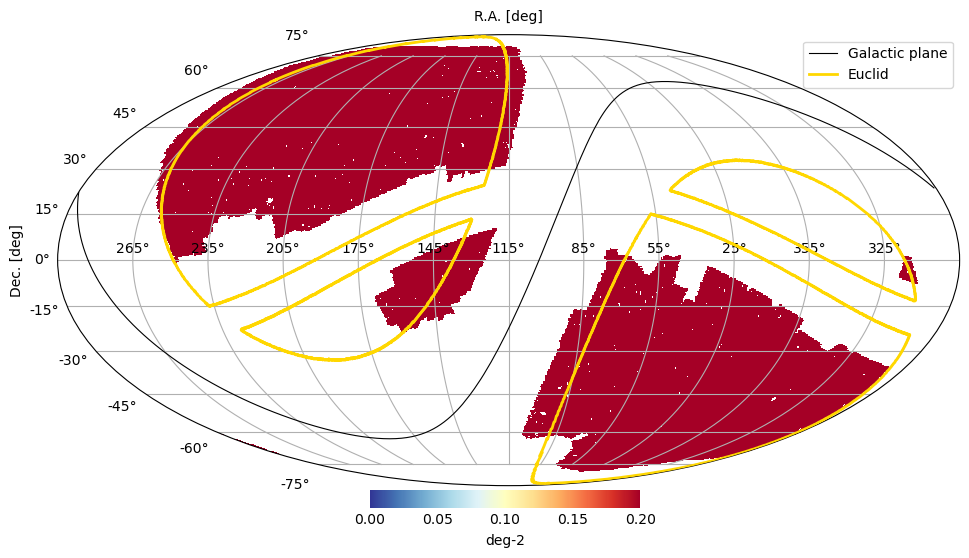

In [1]:
from mpytools import Catalog
import utils
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as patches
from matplotlib.path import Path
import ligo.skymap.postprocess

euclid_fp = Catalog.read('../rsd2024a-footprint-equ-13.fits')
hpmap = np.ones(euclid_fp['M'].size)
hpmap[euclid_fp['M'] == 0] = 0
utils.plot_moll(hpmap, rot=115, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=False)


In [2]:
import healpy as hp

hpmap_out = hp.ud_grade(hpmap, 256)


In [18]:
hpmap_out = hp.ud_grade(hpmap_out, 128)

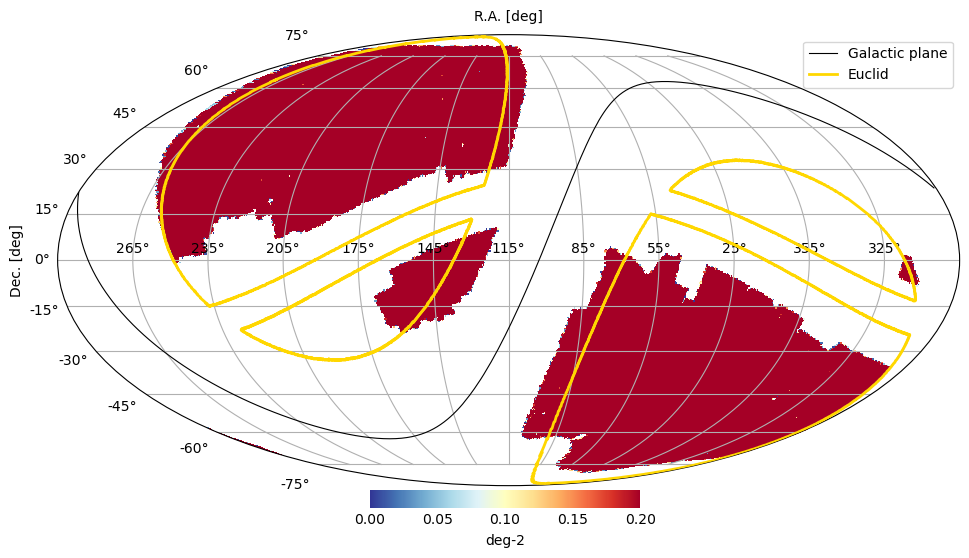

In [19]:
utils.plot_moll(hpmap_out, rot=115, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=True)


In [138]:
hpmap_out_sgc = hpmap_out.copy()
hpmap_out_sgc[utils.healpix_in_sgc(128)] = 0 


In [139]:
nside=128
theta, phi = hp.pix2ang(nside, range(hp.nside2npix(nside)),nest=False)  
ra= phi*180./np.pi
dec = 90.-(theta*180./np.pi)

hpmap_out_sgc[dec <-10] = 0 
hpmap_out_sgc[ra <300] = 0 

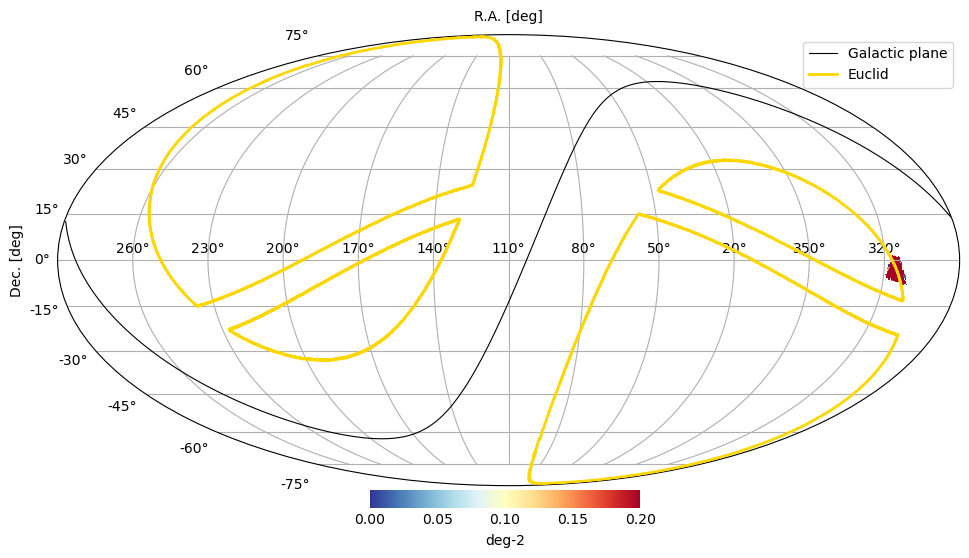

In [140]:
utils.plot_moll(hpmap_out_sgc, rot=110, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=False)


array([     0,      1,      2, ..., 196605, 196606, 196607])

In [61]:
hp.pix2ang(128, np.arange(hp.nside2npix(128)), nest=True,  lonlat=True)[0][hpmap_out_sgc!=0]

array([87.1875   , 87.5390625, 86.8359375, ..., 60.46875  , 54.4921875,
       54.84375  ])

TypeError: _AxesBase.add_patch() got an unexpected keyword argument 'color'

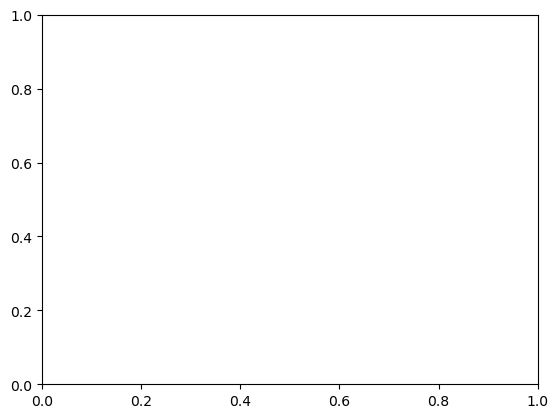

In [147]:

ra_center=110
#ax = ar_init_sky(desi=False, fourmost=False, ra_center=ra_center)
fig, ax = plt.subplots(1)
tt = ligo.skymap.postprocess.contour(hpmap_out_sgc,[.001])
tt = tt[0][0]
'''ra_center=np.radians(ra_center)
ra = np.remainder(np.array(tt)[:,0].reshape(len(tt),1) + 2*np.pi - ra_center, 2*np.pi)
        #
        # Scale conversion to [-180, 180].
        #
ra[ra > np.pi] -= np.pi*2
ra = ra[mask_dec]
dec= np.array(tt)[:,1][mask_dec]
ngcpoly = Path(np.vstack((-ra.T,dec)).T)'''


ra = np.array(tt)[:,0].reshape(len(tt),1)

ra = utils.projection_ra(np.rad2deg(ra), ra_center=ra_center)
dec= np.array(tt)[:,1]
ngcpoly = Path(np.vstack((ra.T,dec)).T)


patch = patches.PathPatch(ngcpoly, facecolor='w', lw=2)
ax.add_patch(patch)
ax.scatter(utils.projection_ra(hp.pix2ang(128, np.arange(hp.nside2npix(128)), nest=False, lonlat=True)[0][hpmap_out_sgc!=0], 
                               ra_center=ra_center), utils.projection_dec(hp.pix2ang(128, np.arange(hp.nside2npix(128)), nest=False, lonlat=True)[1][hpmap_out_sgc!=0]), s=0.01)

'''ttt = [pd.read_csv(path, header=None) for path in glob.glob('/pscratch/sd/a/arocher/4MOST/LRG_SGC/LRG_SGC_exterior*.csv')]
for tt in ttt:
    ax.plot(ax.projection_ra(tt[0]), ax.projection_dec(tt[1]),c='r')'''
plt.show()
ngcpoly

In [142]:
np.save('euclid_sgc_low_footprint.npy', ngcpoly.to_polygons()[0])